In [1]:
import sys
sys.path.insert(0, r'../../quetzal/')
import syspy

import geopandas as gpd
ipath = r'inputs/'

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

## Zoning handling examples
- cleaning a zoning
TODO: create zoning with holes
- clustering
- renumbering
- snail renumbering
- coloring


<AxesSubplot:>

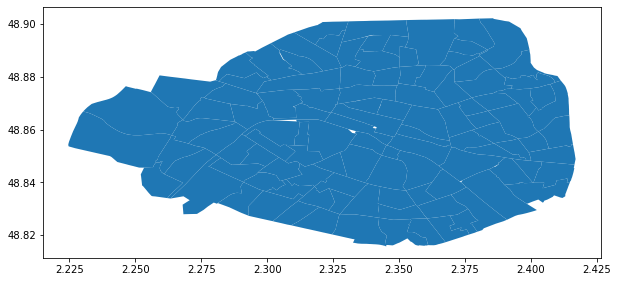

In [3]:
zones = gpd.read_file(ipath + r'zones_with_problems.geojson', driver='GeoJSON')
zones.plot()

<AxesSubplot:>

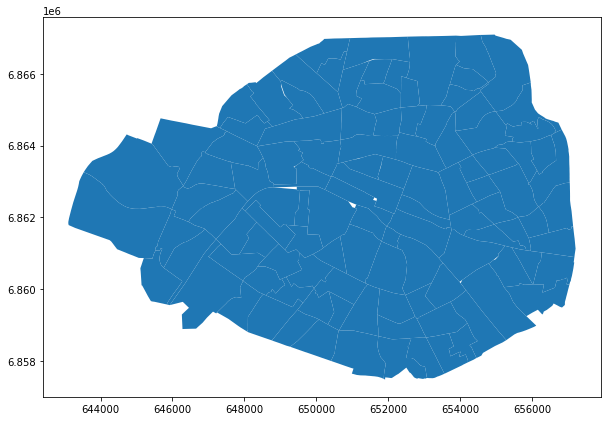

In [4]:
zones = zones.to_crs(epsg=2154)
zones.plot()

In [6]:
from syspy.spatial import polygons, zoning

In [7]:
zones_clean = zones.copy()
zones_clean.geometry = polygons.clean_zoning(zones.geometry, coordinates='meter', buffer=50)

remove_overlaps: 100%|██████████| 110/110 [00:00<00:00, 1804.53it/s]


<AxesSubplot:>

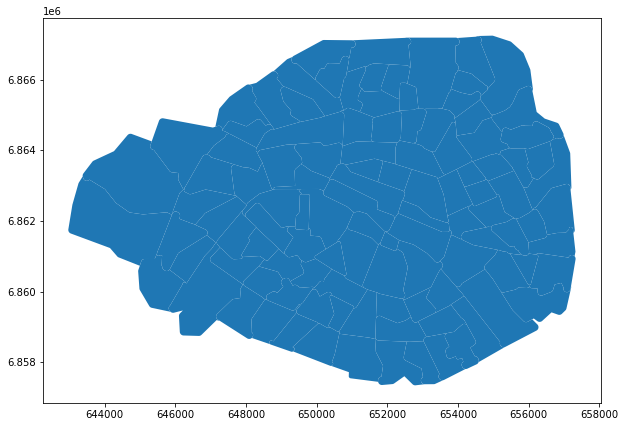

In [8]:
zones_clean.plot()

In [9]:
zones = zones_clean.copy()

# clustering

In [10]:
from syspy.spatial import spatial
spatial.zone_clusters??

Signature:
spatial.zone_clusters(
    zones,
    n_clusters=10,
    buffer=None,
    cluster_column=None,
    geo_union_method=<function union_geometry at 0x000002A721E76438>,
    geo_join_method=<function <lambda> at 0x000002A721E790D8>,
)
Docstring: <no docstring>
Source:   
def zone_clusters(
    zones,
    n_clusters=10,
    buffer=None,
    cluster_column=None,
    geo_union_method=union_geometry,
    geo_join_method=lambda g: g.convex_hull
):
    n_clusters = min(n_clusters, len(zones))

    df = gpd.GeoDataFrame(add_centroid(zones))

    if buffer:
        df['geometry'] = df['geometry'].apply(lambda g: g.buffer(buffer))
    x = df[['longitude', 'latitude']].values

    if cluster_column:
        cluster_series = df['cluster'] = df[cluster_column]
    else:
        y_pred = KMeans(n_clusters=n_clusters, random_state=1).fit_predict(x)
        cluster_series = df['cluster'] = pd.Series(y_pred, index=df.index)

    cluster_series.name = 'cluster'

    geo = df.dissolve('cluster')['

In [14]:
len(zones)

110

In [12]:
cluster_geoms, cluster_ids = spatial.zone_clusters(zones, n_clusters=30)

<AxesSubplot:>

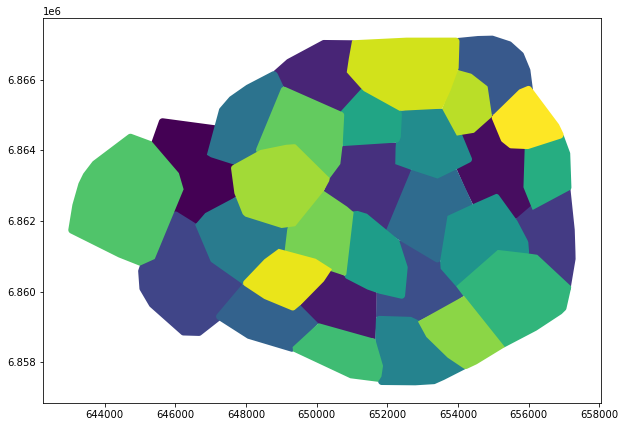

In [13]:
gpd.GeoDataFrame(cluster_geoms).reset_index().plot('cluster')

In [15]:
zones['cluster'] = cluster_ids

In [16]:
zones.head()

,index,area,emp,emp_dens,id,name,pop,pop_dens,geometry,cluster
0,zone_0,7.573637e+05,8362.052747,11041,1,1,264.319936,349,"POLYGON ((651161.208 6862286.153, 651159.950 6...",4
1,zone_1,1.057626e+06,55150.981545,52146,2,2,17338.725721,16394,"POLYGON ((650352.603 6863132.609, 650351.850 6...",4
2,zone_2,4.397285e+05,31273.053465,71119,3,3,4659.363525,10596,"POLYGON ((651628.547 6863761.701, 651633.024 6...",4
3,zone_3,5.628178e+05,31399.041132,55789,4,4,15915.361185,28278,"POLYGON ((652202.558 6863621.062, 652207.229 6...",4
4,zone_4,1.169330e+06,29889.237285,25561,5,5,34969.974971,29906,"POLYGON ((652676.086 6863449.965, 652680.370 6...",10


<AxesSubplot:>

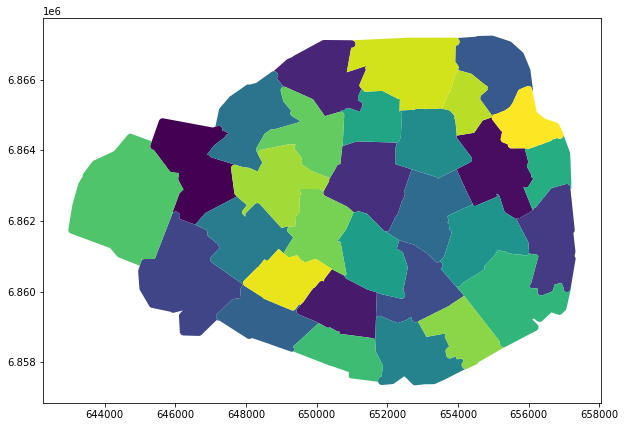

In [17]:
zones.dissolve('cluster').reset_index().plot('cluster')

# renumbering

In [18]:
from shapely.ops import cascaded_union

In [19]:
center = cascaded_union(zones.iloc[40:50].geometry.values).centroid
zones['new_id'] = zoning.snail_number(zones, center)

<AxesSubplot:>

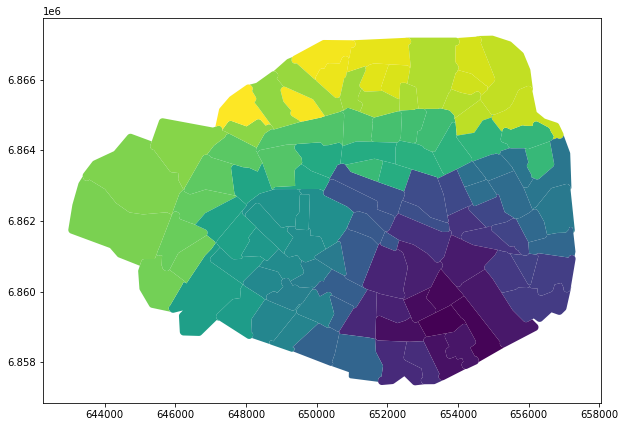

In [20]:
zones.plot('new_id')

<AxesSubplot:>

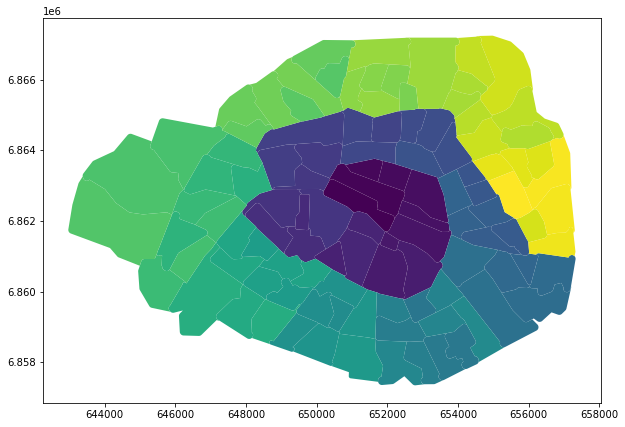

In [21]:
zones.plot('id')

In [22]:
zones['new_clustered_id'], zones['color_cluster'] = zoning.cluster_snail_number(zones, n_clusters=8)

<AxesSubplot:>

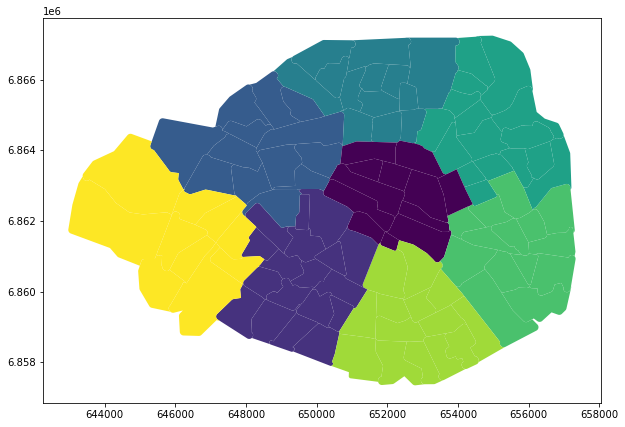

In [24]:
zones.plot('color_cluster')

<AxesSubplot:>

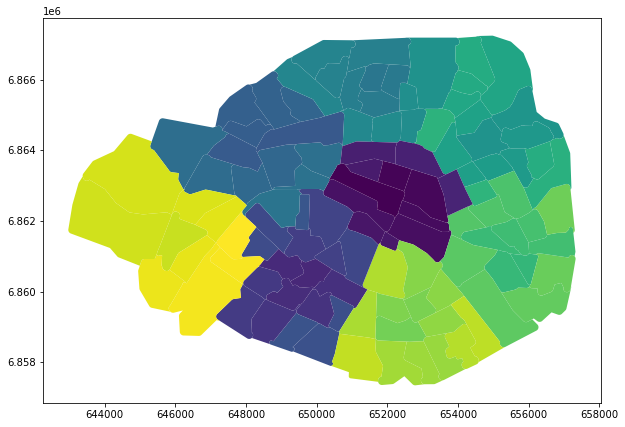

In [25]:
zones.plot('new_clustered_id')

## Coloring
Using official systra colors, or http://colorbrewer2.org/

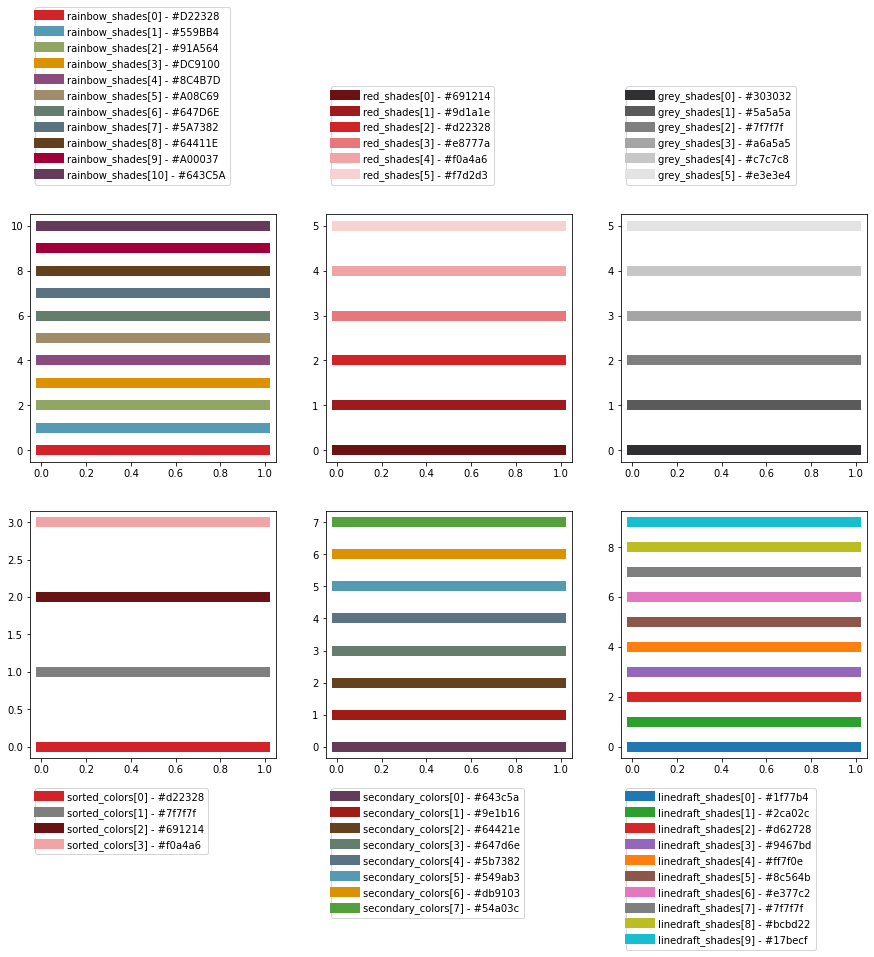

In [26]:
from syspy.syspy_utils import syscolors
syscolors.show_all_colors()

In [34]:
from syspy.spatial.zoning import greedy_color

zones['color'] = greedy_color(zones, colors=syscolors.secondary_colors[::-1])

neighborhood_dataframe:   8%|▊         | 9/110 [00:00<00:01, 89.97it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

neighborhood_dataframe:  25%|██▌       | 28/110 [00:00<00:00, 89.85it/s]


'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing 

neighborhood_dataframe:  48%|████▊     | 53/110 [00:00<00:00, 101.54it/s]

  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'lo

neighborhood_dataframe:  75%|███████▌  | 83/110 [00:00<00:00, 119.38it/s]

  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'lo

neighborhood_dataframe:  86%|████████▋ | 95/110 [00:00<00:00, 118.06it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

neighborhood_dataframe: 100%|██████████| 110/110 [00:00<00:00, 113.02it/s]

'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing centroid
'longitude'  --> computing c

<AxesSubplot:>

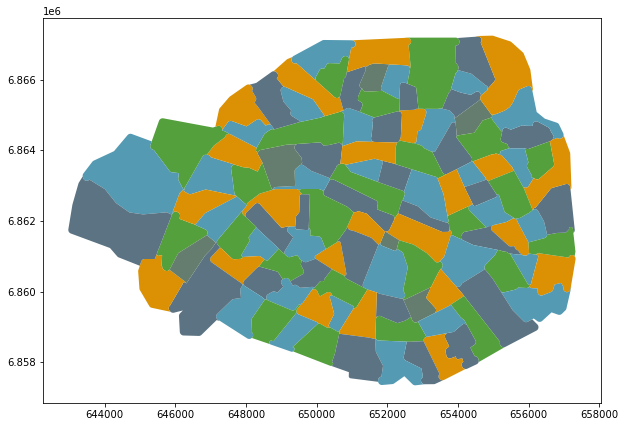

In [35]:
zones.plot(color=zones['color'])